Hi Juliette!

My name is Natalia Bernshtein and I am happy to review your work.

If there are any mistakes or imprecisions, I'll give you a hint about it, allowing you to find it and fix it by yourself. The same would be done by your teamlead in your real workplace, so it's good practice! However, should there be any further issues, I'll add some details to help you.

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

The purpose of this project is to determine which factors, such as model, color, or year, most impact the price of a car that is being sold. Multiple factors will be analyzed to determine which are correlated with higher or lower prices.

To accomplish this, I will first preprocess the data by cleaning it, addressing missing/odd values, and converting the data types. I will create derived columns to make the data easier to work with for the analysis, then I will carry out exploratory data analysis. During EDA, I will look at multiple parameters, observe outliers within the data, and determine which factors impact price the most.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thank you for including an intro to your project and also the plan of your analysis!
</div>

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Keeping all imports in a separate cell is a good practice, well done. This way we don't need to reload data if we decide to add a new import, for example.
</div>

### Load data

In [2]:
# Load the data file into a DataFrame
try:
    df = pd.read_csv('/datasets/vehicles_us.csv')
except:
    print("Invalid path.")

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

In order to make this cell work both on the platform and on your computer, you can use try-except construction (see section **8.3. Handling Exceptions** here: https://docs.python.org/3/tutorial/errors.html. We can `try` to read our file using its local path, and use the platform path should we get an exception :)
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you, I've added the try-except block!
</div>

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
# Print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Print a sample of data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Between the data information and the first few rows I've observed, there are a few elements to note. The columns `model_year`, `cylinders`, and `is_4wd` are all float types, but it appears they should all be converted to integers. `date_posted` is a string (object) data type but should be converted to a datetime object.

There are also null values in `model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd` that will need to be addressed. The missing values in `is_4wd` will need to be investigated further, as approximately half of its values are null.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent! `info` and `head` are really the fastest and easiest way to get some sense of our data. And it's very good that you listed your observations in such a structured manner.
</div>

### Conclusions and further steps

Going forward, the missing values will need to be addressed in each column. It will be possible for some values to be extrapolated based on other values in the data, but it will be difficult to fill arbitrary values, such as `paint_color`. There are numerous float types that will need to be converted to integer types as well. 

## Treat missing values

First, I will check missing values for the following columns: `model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd`.

### Model Year

In [5]:
# Check percentage of missing values
print(f'Percent of values missing: {df.model_year.isnull().sum() / len(df):.2%}')

Percent of values missing: 7.02%


<AxesSubplot:title={'center':'Advertisements For Each Model Year'}, xlabel='Years', ylabel='Number of ads'>

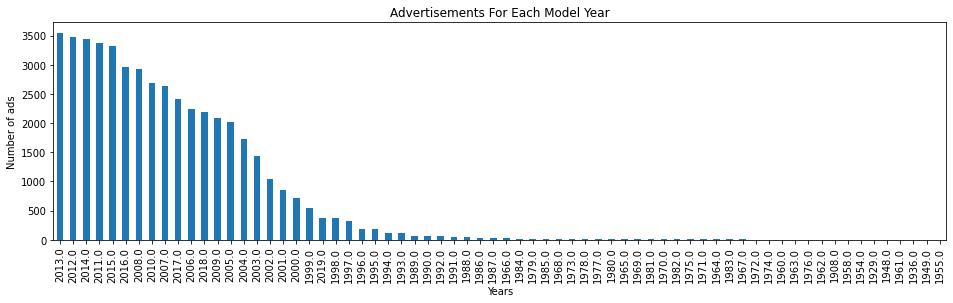

In [6]:
# Check distribution of model_years
df['model_year'].value_counts().plot(kind='bar', figsize=(16,4),
                                     title='Advertisements For Each Model Year',
                                     xlabel='Years',
                                     ylabel='Number of ads'
                                    )

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Here and below: please add chart titles and axes names to each chart :) It's really important as it helps the potential reader to understand better what's going on in the chart.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I have added axes names and a chart title.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

Well done, thank you!
</div>

Since 7% of the data has a missing `model_year`, I do not want to drop these rows. From this bar chart, we can see that model years between 2000-2018 are the most popular, with 2011-2016 being the top five. There are a few cars with model years in 1990 and before, but these are outliers. As such, a median will need to be used to fill the missing values. The median of each model will be used to fill in this information.

In [7]:
# Fill in missing value based on median year of a car's model
df['model_year'] = df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'))

In [8]:
# Checking if values were filled
df['model_year'].isnull().any()

False

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! It actually is reasonable to assume that model year correlates with vehicle's model.
</div>

### 4wd

In [9]:
# Check percentage of missing values
print(f'Percent of values missing: {df.is_4wd.isnull().sum() / len(df):.2%}')

Percent of values missing: 50.37%


In [10]:
# Checking unique values
df['is_4wd'].unique()

array([ 1., nan])

`is_4wd` seems like a binary variable, with 1 if the vehicle has a four-wheel drive and 0 otherwise. There are no 0 values however, so this could just be user error. I will fill all missing values with 0.

In [11]:
# Filling missing values
df['is_4wd'] = df['is_4wd'].fillna(0)

In [12]:
# Checking counts to make sure it's been addressed
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

100% correct!
</div>

### Cylinders

In [13]:
# Check percentage of missing values
print(f'Percent of values missing: {df.cylinders.isnull().sum() / len(df):.2%}')

Percent of values missing: 10.21%


In [14]:
# Checking number of cylinders
df.cylinders.value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

Most cars have 8, 6, or 4 cylinders, with very few having significantly more or less than that. Similar to `model_year`, the number of cylinders likely is related to the model. The median will be used given that there are significantly less cars that fall outside the 4, 6, 8 cylinder range.

In [15]:
# Filling cylinders based on model of a car
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model'])['cylinders'].transform('median'))

In [16]:
# Checking if values were filled
df['cylinders'].isnull().any()

False

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Everything looks good here :)
</div>

### Paint Color

In [17]:
# Check percentage of missing values
print(f'Percent of values missing: {df.paint_color.isnull().sum() / len(df):.2%}')

Percent of values missing: 17.99%


<AxesSubplot:title={'center':'Non-Null Vehicle Paint Colors Across Advertisements'}, xlabel='Color', ylabel='Number of Ads'>

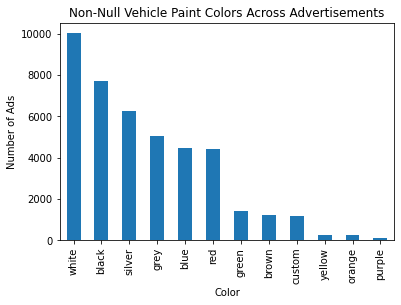

In [18]:
# Checking distribution of colors
df[df['paint_color'].notnull()]['paint_color'].value_counts().plot(kind='bar',
                                                                   title='Non-Null Vehicle Paint Colors Across Advertisements',
                                                                   xlabel='Color',
                                                                   ylabel='Number of Ads')

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I've added a title and axes names.
</div>

In [19]:
# Checking rows with missing paint_color
df[df['paint_color'].isnull()].reset_index(drop=True)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
2,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
3,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
4,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9262,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,0.0,2019-04-01,175
9263,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,0.0,2019-02-27,73
9264,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
9265,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,0.0,2018-11-24,89


There does not seem to be a reason as to why the values in `paint_color` are missing. Though certain models or years may have more popular colors, this is ultimately arbitrary and is not something we can fill in. However, 18% of the data has missing values. This is a significant amount of data and it would be troubling to drop given that the other columns are filled in. 

NaN values can be problematic, however, when performing calculations. As such, the NaN values in `paint_color` will be filled in with the value "Unknown" and omitted from our analysis of car color.

In [20]:
# Filling paint_color with 'Unknown'
df['paint_color'] = df['paint_color'].fillna('unknown')

In [21]:
# Check if filled
df['paint_color'].isnull().any()

False

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great that you decided to check whether there was a reason to why values are missing. As to the way you handled them - couldn't have done it better myself :)
</div>

### Odometer

In [22]:
# Check percentage of missing values
print(f'Percent of values missing: {df.odometer.isnull().sum() / len(df):.2%}')

Percent of values missing: 15.32%


In [23]:
# Filling missing values based on the model_year and condition of the car
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year', 'condition'])['odometer'].transform('median'))

An odometer measures the distance a car has traveled. Instinctively, older cars will have traveled more, as well as cars that may be in worse conditions. This is not a universal measure (as there are cars that may have been in crashes that are in poor condition, for example) but it will work for our analysis. As such, the missing values will be filled based on the model_year and car condition.

In [24]:
# Checking if values have been filled
df['odometer'].isnull().any()

True

In [25]:
# Seeing which rows are not filled
df[df['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,0.0,2018-12-15,18
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,unknown,0.0,2018-11-03,41
31806,1700,1996.0,ford mustang,salvage,6.0,gas,NaN,manual,convertible,white,0.0,2019-03-31,46
33257,4500,1963.0,chevrolet impala,fair,6.0,gas,NaN,automatic,sedan,unknown,0.0,2019-03-17,38
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59
46911,22300,2003.0,chevrolet corvette,new,8.0,gas,NaN,manual,convertible,black,0.0,2018-11-08,23


Filling by `model_year` and `condition` did not fill in every row. For the above rows that are still null, there is no other tow in the data with the same combination of `model_year` and `condition`. For example, row 21421 is the only row in the dataset that has a chevrolet corvette that was made in 1974.

The unique rows will be filled in solely based on condition.

<div class="alert alert-block alert-warning">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Can you think of a reason for why not all values could be filled?
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I have added a reason to my explanation above.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

You're absolutely right :)
</div>

In [26]:
# Fill remaining rows
df['odometer'] = df['odometer'].fillna(df.groupby(['condition'])['odometer'].transform('median'))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


We no longer have null values in the dataset.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

## Fix data types

Next, the data types will be adjusted to make it easier for analysis. `cylinder`, `odometer`, and `is_4wd` will be converted to integers given that there are no floats located within them. 

`date_posted` will be converted to a datetime type so that the year, month, and day values within it can be extracted easily. This will be useful when we enrich the data and calculate the age of the vehicle, for example.

In [28]:
# Convert float columns to ints
df['cylinders'] = df['cylinders'].astype('int')
df['odometer'] = df['odometer'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('int')

In [29]:
# Convert date columns to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [30]:
# Make values in vehicle type lowercase
df['type'] = df['type'].str.lower()

In [31]:
# Checking data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,suv,unknown,1,2018-06-23,19
1,25500,2011.0,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8,gas,193850,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28


In [32]:
# Making sure data types have been updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.1+ MB


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great, now our dataframe is perfect!
</div>

## Enrich data

### Advertisement date information

In [33]:
# Add datetime values for when the ad was placed
df['post_weekday'] = df['date_posted'].dt.day_name()
df['post_month'] = df['date_posted'].dt.month_name()
df['post_year'] = df['date_posted'].dt.year

### Vehicle age and mileage

In [34]:
# Add the vehicle's age when the ad was placed
df['vehicle_age'] = df['post_year'] - df['model_year']

# Add one to the vehicle age
df['vehicle_age'] = df['vehicle_age'] + 1

In [35]:
# Add the vehicle's average mileage per year
df['mileage_per_year'] = df['odometer'] / df['vehicle_age']

The `vehicle_age` column was created based on when the advertisement was posted and when the car was made. Every value in the age column was incremented by 1 (so a car with a `model_year` of 2019 and a `post_year` of 2020 will have a `vehicle_age` of 2. This will prevent divide-by-zero errors in the code.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

To avoid such situations, we could work with vehicle_age column and get rid of zero values there. This could be done by adding 1 to each value. Then a car with model_year = 2017 with an ad posted in 2018 will have vehicle_age = 2, and a car with model_year = 2018 with an ad posted in 2018 will have vehicle_age = 1 e.t.c. <br>
<br>
Let me explain why it might be a better solution: please have a look at the table below. You can see that odometer value of cars with age 1 is (on average) twice as high as that of cars with age 0. So they clearly should be divided by different age values in order to get the correct answer.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

That makes sense, thank you for the alternative solution! I've updated the code and my description for that section.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

Good job!
</div>

In [36]:
#REVIEWER'S CODE
df.groupby('vehicle_age')[['odometer']].mean()

,odometer
vehicle_age,
1.0,22341.637546
2.0,42345.342830
3.0,56965.804750
4.0,75451.304039
5.0,88947.122310
...,...
70.0,1800.000000
72.0,4000.000000
83.0,30000.000000


In [37]:
# Replacing textual conditions to numeric to make them easier to work with
def string_condition_to_numeric(condition):
    if condition == "new":
        return 5
    elif condition == "like new":
        return 4
    elif condition == "excellent":
        return 3
    elif condition == "good":
        return 2
    elif condition == "fair":
        return 1
    else:
        return 0

# Apply function
df['condition'] = df['condition'].apply(string_condition_to_numeric)

In [38]:
# Checking new values in condition
df.condition.value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

Text values in `condition` were replaced with numeric values to allow us to find statistics based on them more easily. This scale is easier to work with, too - higher values represent better conditions.

## Check clean data

The data is now ready for analysis, so I will print general information about the data to work with it.

In [39]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  float64       
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int64         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  int64         
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  post_weekday      51525 non-null  object        
 14  post_month        5152

In [40]:
# print a sample of data
df.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,post_weekday,post_month,post_year,vehicle_age,mileage_per_year
51515,12000,2005.0,chevrolet silverado 2500hd,2,8,diesel,228000,automatic,pickup,silver,1,2018-08-18,52,Saturday,August,2018,14.0,16285.714286
51516,8999,2011.0,jeep grand cherokee,2,6,gas,131751,automatic,suv,white,1,2018-11-01,51,Thursday,November,2018,8.0,16468.875000
51517,11000,2012.0,dodge charger,3,8,gas,81000,automatic,sedan,black,0,2019-04-19,44,Friday,April,2019,8.0,10125.000000
51518,3750,2005.0,ford taurus,3,6,gas,110200,automatic,sedan,silver,0,2018-08-10,63,Friday,August,2018,14.0,7871.428571
51519,11750,2015.0,honda accord,3,4,gas,78155,automatic,coupe,unknown,0,2018-11-24,89,Saturday,November,2018,4.0,19538.750000
51520,9249,2013.0,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,Wednesday,October,2018,6.0,14689.333333
51521,2700,2002.0,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,Wednesday,November,2018,17.0,10676.470588
51522,3950,2009.0,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,Thursday,November,2018,10.0,12800.000000
51523,7455,2013.0,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,Monday,July,2018,6.0,23262.166667
51524,6300,2014.0,nissan altima,2,4,gas,94009,automatic,sedan,unknown,0,2018-06-05,10,Tuesday,June,2018,5.0,18801.800000


## Study core parameters

The parameters are:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

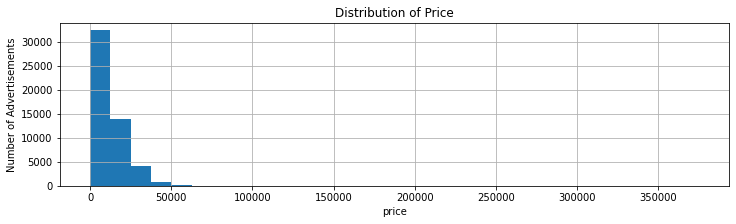

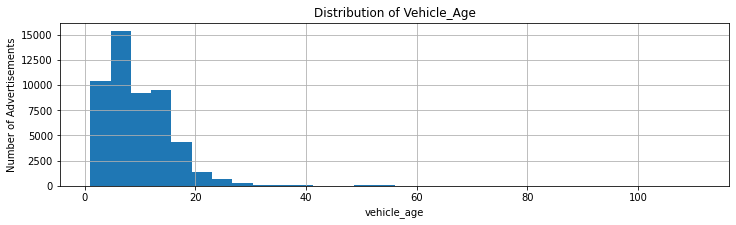

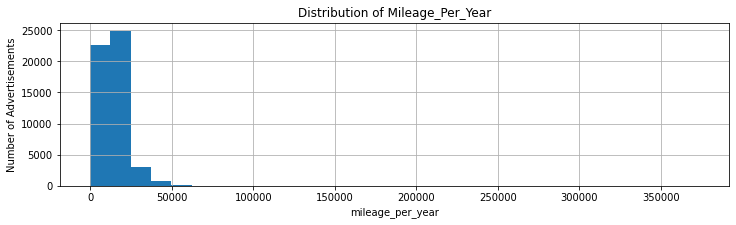

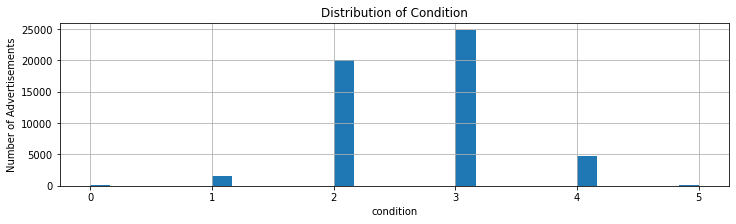

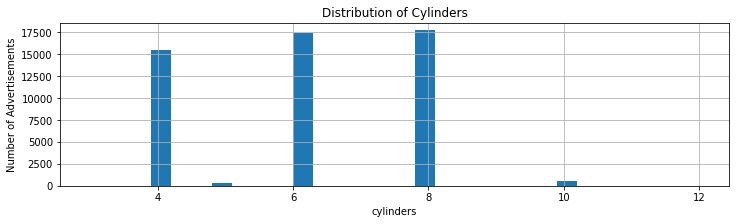

In [41]:
# list of three parameters to observe
core_parameters = ['price', 'vehicle_age', 'mileage_per_year', 'condition', 'cylinders']

# plot histograms for each core parameter
for column in core_parameters:
    df[column].hist(bins=30, figsize=(12, 3))
    plt.title(f'Distribution of {column.title()}')
    plt.xlabel(column)
    plt.ylabel("Number of Advertisements")
    plt.show()

While `cylinders` and `condition` look fine due, the graphs of `price`, `vehicle_age`, and `mileage_per_year` are extremely difficult to read due to the space on the right. This indicates that there are outliers in our data - cars that have an unusually high selling price, age, or mileage. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good thinking about outliers affecting the readability of the charts.
</div>

## Study and treat outliers

These outliers may significantly skew our results, so I will create a dataframe where outliers are filtered out. I will do this by checking the upper limit of `price`, `vehicle_age`, and `mileage_per_year` (based on each IQR) and filtering out data that falls beyond that.

In [42]:
# columns to find outliers for
columns = ['price', 'vehicle_age', 'mileage_per_year']

# dictionaries to store limits for each parameter
upper_limits = {}

# for each column, add limits to the dictionaries
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    upper_limits[column] = upper_limit

In [43]:
# checking our upper limits
upper_limits

{'price': 34597.5, 'vehicle_age': 25.0, 'mileage_per_year': 29646.923076923078}

In [44]:
# query out outliers in price, vehicle_age, and mileage_per_year
df_filtered = df.query("price < @upper_limits['price'] & vehicle_age < @upper_limits['vehicle_age'] & mileage_per_year < @upper_limits['mileage_per_year']")

In [45]:
# check new df
print(df_filtered['price'].describe())
print('\n', df_filtered['vehicle_age'].describe())
print('\n', df_filtered['mileage_per_year'].describe())

count    46968.000000
mean     10979.565044
std       7754.972548
min          1.000000
25%       4995.000000
50%       8900.000000
75%      15500.000000
max      34595.000000
Name: price, dtype: float64

 count    46968.000000
mean         9.534885
std          4.980611
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         24.000000
Name: vehicle_age, dtype: float64

 count    46968.000000
mean     13495.102652
std       5598.978666
min          0.000000
25%       9833.333333
50%      13083.333333
75%      16819.781250
max      29643.250000
Name: mileage_per_year, dtype: float64


Our filtered dataframe has 46313 rows, meaning that we've lost about 10% of our data during the filtering of these outliers.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good idea to use IQR analysis!
</div>

## Study core parameters without outliers

The histograms for `price`, `vehicle_age`, and `mileage_per_year` will be viewed again now that the outliers have been filtered out.

<AxesSubplot:title={'center':'Price Distribution (without outliers)'}, ylabel='Frequency'>

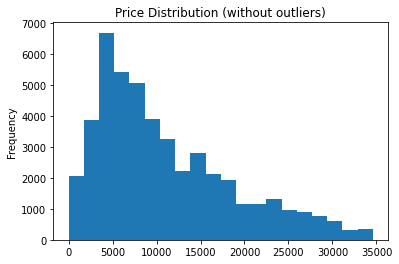

In [46]:
# create histogram for the price column
df_filtered['price'].plot(kind='hist', bins=20,
                         title='Price Distribution (without outliers)',
                         xlabel='Price',
                         ylabel='Number of Advertisements')

In [47]:
# view info on column 
df_filtered['price'].describe()

count    46968.000000
mean     10979.565044
std       7754.972548
min          1.000000
25%       4995.000000
50%       8900.000000
75%      15500.000000
max      34595.000000
Name: price, dtype: float64

The histogram is significantly easier to read now, though there is still a right skew. The histogram peaks around \$2500 to \\$7500
This seems to be the most common selling price of each vehicle. 

<AxesSubplot:title={'center':'Vehicle Age Distribution (without outliers)'}, ylabel='Frequency'>

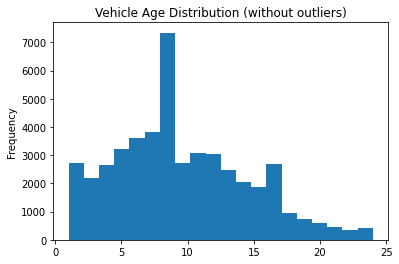

In [48]:
df_filtered['vehicle_age'].plot(kind='hist', bins=20,
                         title='Vehicle Age Distribution (without outliers)',
                         xlabel='Vehicle Age',
                         ylabel='Number of Advertisements')

In [49]:
# view info on column 
df_filtered['vehicle_age'].describe()

count    46968.000000
mean         9.534885
std          4.980611
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         24.000000
Name: vehicle_age, dtype: float64

`vehicle_age` is also easier to read. There is still a slight right skew in this graph as well as two peaks around vehicle ages of 7 and 16. The other ages follow a curve, but there seems to be a high proportion of cars sold with these ages.

<AxesSubplot:title={'center':'Mileage Per Year Distribution (without outliers)'}, ylabel='Frequency'>

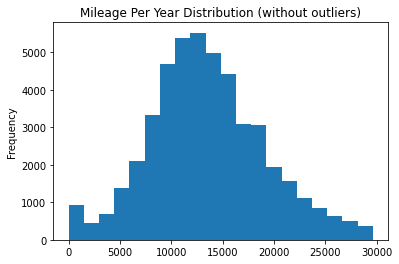

In [50]:
df_filtered['mileage_per_year'].plot(kind='hist', bins=20,
                         title='Mileage Per Year Distribution (without outliers)',
                         xlabel='Mileage Per Year',
                         ylabel='Number of Advertisements')

In [51]:
# view info on column 
df_filtered['mileage_per_year'].describe()

count    46968.000000
mean     13495.102652
std       5598.978666
min          0.000000
25%       9833.333333
50%      13083.333333
75%      16819.781250
max      29643.250000
Name: mileage_per_year, dtype: float64

`mileage_per_year` is relatively normal looking, and the mean and medians are very close together (varying by only 1000 miles). 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thank you for not forgetting to include intermediate conclusions to your project! They are as important as your code :)
</div>

## Ads lifetime

Next, I will look at `days_listed` and see how quickly advertisements were taken down.

In [52]:
# view information about the days_listed column
df_filtered['days_listed'].describe()

count    46968.000000
mean        39.555101
std         28.229844
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The mean of this column is about 39 days and the median is 33 days. This indicates we likely have outliers pulling the mean up - our max value is 271 days, which is an abnormally long time. Next, I will look at a boxplot of the `days_listed` to see what unusually high and low values are.

Text(0.5, 0, 'Number of Advertisements')

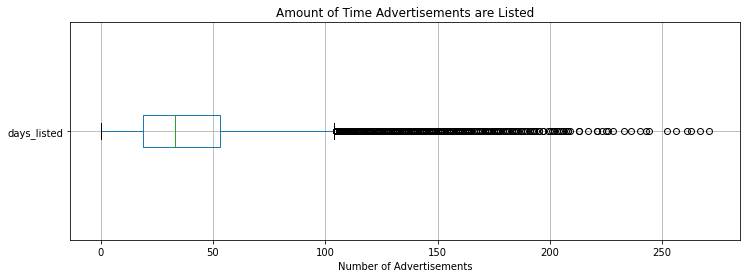

In [53]:
# view boxplot of days_listed to see outliers
df_filtered.boxplot(column='days_listed', vert=False, figsize=(12, 4))
plt.title("Amount of Time Advertisements are Listed")
plt.xlabel("Number of Advertisements")

Text(0, 0.5, 'Number of Advertisements')

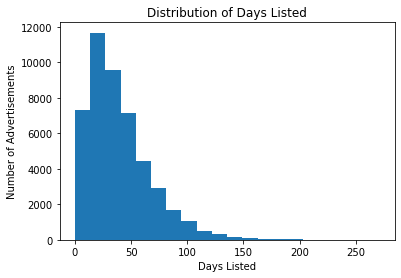

In [54]:
df_filtered['days_listed'].plot(kind='hist', bins=20, title='Distribution of Days Listed')
plt.xlabel("Days Listed")
plt.ylabel("Number of Advertisements")

Most advertisements were taken down within approximately 105 days, though there are many cases where advertisements stayed up for upwards of 200. In general, a majority of the advertisements were taken down between 20 and 55 days, with the greatest amount of advertisements being taken down around 25 days.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

Could you please also add a histogram to this section?
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I have added a histogram.</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

Thank you!
</div>

## Average price per each type of vehicle

In [55]:
# create and print pivot table that has number of advertisements and average price for each type of vehicle
avg_price_per_type = df_filtered.reset_index().pivot_table(index='type', values=['price', 'index'], aggfunc={'price': 'mean', 'index': 'count'}).rename(columns = {"index": "ads"}).sort_values(by='ads', ascending=False)
avg_price_per_type

,ads,price
type,,
suv,11625,10272.087484
sedan,11600,6820.204741
truck,10710,14707.275537
pickup,6145,14667.057771
coupe,2012,13464.317097
wagon,1493,8818.630275
mini-van,1091,7745.766269
hatchback,984,6736.648374
van,550,8454.321818


<AxesSubplot:title={'center':'Type of Vehicle and Number of Advertisements Posted'}, xlabel='Type of Vehicle', ylabel='Number of Advertisements'>

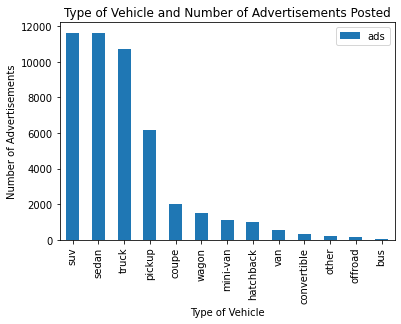

In [56]:
avg_price_per_type.reset_index().plot(kind = 'bar', 
                                      x = 'type', y = 'ads', 
                                      title = 'Type of Vehicle and Number of Advertisements Posted',
                                      xlabel= 'Type of Vehicle',
                                      ylabel = 'Number of Advertisements'
                                     )

SUVs and Sedans have the most advertisements up for them.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You're totally right here!
</div>

## Price factors

`vehicle_age`, `mileage_per_year`, `condition`, `transmission`, and `paint_color` will be compared against `price` to determine which factors most affect the cost of a vehicle being sold. For `transmission` and `paint_color`, box plots were plotted, as these columns are categorical. The other columns are all quantitative, and so I will make scatterplots for them.

I will also create a correlation matrix to determine which quantitative factors are affecting price the most.

In [57]:
# the columns we want to analyze
factors = ['price', 'vehicle_age', 'mileage_per_year', 'condition', 'transmission', 'paint_color']

# create dataframes for suvs and sedans
suv_df = df_filtered.query("type == 'suv'")[factors].reset_index(drop=True)
sedan_df = df_filtered.query("type == 'sedan'")[factors].reset_index(drop=True)

In [58]:
# view suv data
suv_df.head()

,price,vehicle_age,mileage_per_year,condition,transmission,paint_color
0,9400,8.0,18125.000000,2,automatic,unknown
1,15990,7.0,15639.000000,3,automatic,black
2,11500,7.0,14882.000000,3,automatic,unknown
3,9200,12.0,12265.916667,3,automatic,blue
4,12990,11.0,12025.909091,3,automatic,black


In [59]:
# view sedan data
sedan_df.head()

,price,vehicle_age,mileage_per_year,condition,transmission,paint_color
0,5500,7.0,15714.285714,4,automatic,red
1,14900,3.0,26967.666667,3,automatic,black
2,14990,5.0,11590.800000,3,automatic,black
3,12990,4.0,19803.000000,3,automatic,white
4,8990,8.0,13892.750000,3,automatic,grey


### Plots

For categorical data, we should only make analyses on categories that have an adequate (50+) amount of data. Before plotting the data, I will observe the number of ads in each color.

In [60]:
# checking number of ads for each color
print(suv_df.paint_color.value_counts())
print(sedan_df.paint_color.value_counts())

unknown    2097
black      2056
white      1809
silver     1480
grey       1103
blue        979
red         865
green       424
brown       354
custom      297
orange       78
yellow       44
purple       39
Name: paint_color, dtype: int64
unknown    2099
silver     1951
black      1679
grey       1550
white      1418
blue       1188
red         919
custom      283
brown       252
green       204
purple       26
yellow       22
orange        9
Name: paint_color, dtype: int64


There is limited information on purple, yellow, and orange vehicles, namely in Sedans. As such, I will filter out these colors from both dataframes, as well as for colors that are unknown.  

In [61]:
# list of colors to filter out
colors_to_remove = ['unknown', 'orange', 'yellow', 'purple']

# applying filtering to dfs
suv_df = suv_df.query('paint_color not in @colors_to_remove')
sedan_df = sedan_df.query('paint_color not in @colors_to_remove')

Now that we've finished filtering our dataframes, I will create boxplots for categorical data and scatteplots for quantitative data.

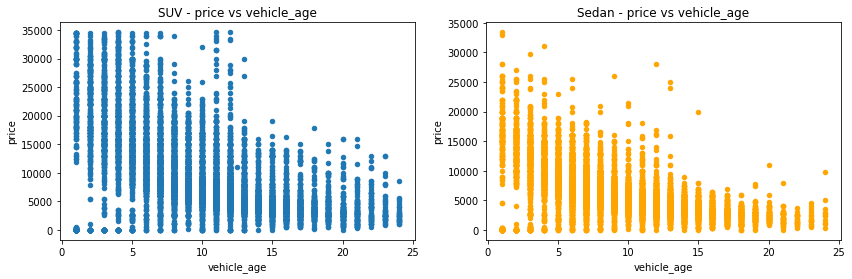

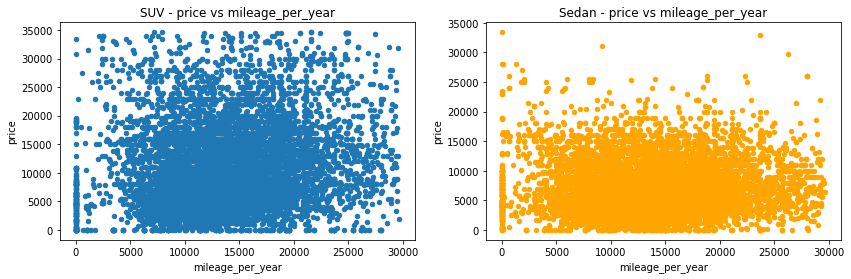

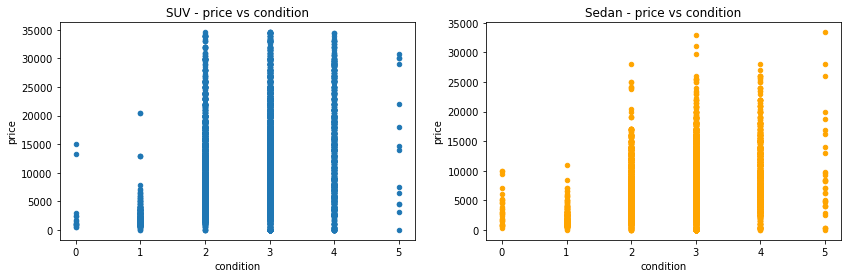

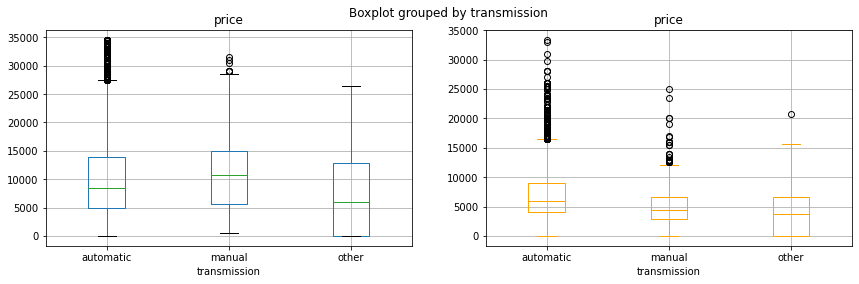

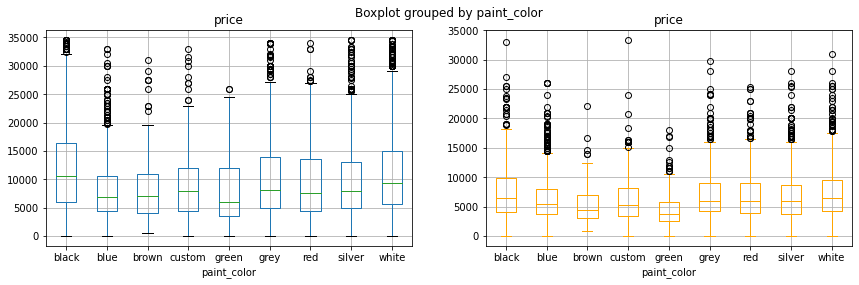

In [62]:
# plotting each factor
for factor in factors[1:]:
    
    # if categorical, print boxplot
    if factor == 'transmission' or factor == 'paint_color':
        fig, ax = plt.subplots(ncols=2, figsize=(14,4))
        suv_df.boxplot(column = 'price', by = factor, ax = ax[0])
        sedan_df.boxplot(column = 'price', by = factor, ax = ax[1], color = 'orange')
        
    # otherwise, print scatterplot
    else:
        fig, ax = plt.subplots(ncols=2, figsize=(14,4))
        suv_df.plot.scatter(x = factor, y = 'price', ax = ax[0], title = f'SUV - price vs {factor}')
        sedan_df.plot.scatter(x = factor, y = 'price', ax = ax[1], title = f'Sedan - price vs {factor}', color = 'orange')

For both SUVs and Sedans, younger vehicles appear to be sold for higher prices than older vehicles. For mileage, the data is clustered towards lower prices. It also appears that cars that are in poor condition (0 or 1) are sold for cheaper.

Transmission type has a variable spread between SUVs and Sedans. Automatic vehicles seem to have more outliers that are sold for more, and both SUVs and Sedans with "other" transmission types are sold for somewhat less.

Finally, paint color is variable between both vehicle types. Some colors, such as black, grey, red, and white are sold for more than other colors, such as blue or brown. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I like it very much that you plotted charts for SUVs and sedans in such a manner that they can be compared so easily! Excellent job!
</div>

### Correlation Matrices

In [63]:
# print correlation matrix for suv
suv_df.corr()

,price,vehicle_age,mileage_per_year,condition
price,1.000000,-0.586174,0.178986,0.264414
vehicle_age,-0.586174,1.000000,-0.480835,-0.320392
mileage_per_year,0.178986,-0.480835,1.000000,-0.003366
condition,0.264414,-0.320392,-0.003366,1.000000


In [64]:
# print correlation matrix for sedan
sedan_df.corr()

,price,vehicle_age,mileage_per_year,condition
price,1.000000,-0.618856,0.076977,0.303810
vehicle_age,-0.618856,1.000000,-0.397547,-0.296658
mileage_per_year,0.076977,-0.397547,1.000000,-0.048154
condition,0.303810,-0.296658,-0.048154,1.000000


For quantitative factors, vehicle age is strongly correlated with price for both SUVs and Sedans. This is a negative correlation and indicates that as vehicle age increases, price decreases. The condition of the car has a slightly positive correlation, in which cars with better conditions can be sold more. A higher mileage is more correlated to increases in price for SUVs and less so for Sedans.

## General conclusion

In this project, I spent time preprocessing and cleaning the data before beginning the analysis. A number of columns had null values that had to be filled. Instead of dropping any of these rows, I relied on other information in the dataset, such as car model, to fill the missing information. The exception to this was with a car's color, where I simply filled the missing values with an "unknown" indicator. After filling missing data, I converted the data to data types that would be easier to work with, such as integers and datetimes, as well as changing the condition column to numeric values so that statistical analysis could be completed easier.

There were many outliers in the dataset that were filtered out before conducting analysis. These outliers were notably in price, vehicle age, and vehicle mileage; some cars were being sold for an abnormally high amount, some were extremely old, and some had a large amount of miles on them.

To check what factors most affected price, the two vehicle types with the largest amount of advertisements (SUVS and Sedans) were looked at more closely. After filtering for these vehicle types, I plotted scatterplots and boxplots for each column and looked at the correlation of the factors to the price.

From the correlation chart and plots of SUVs and Sedans, it appears that a vebicle's age, condition, and color most affects price. As we can see from the charts, namely for color, these factors may vary from vehicle to vehicle. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thank you for such a detailed conclusion!
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thank you for submitting your project! I can see that you've put a lot of work into it and I'm really impressed. I just loved how clean it is, how accurately you followed project description and how detailed your notes and conclusions are. Also you used various instruments to analyze your data which is great.
<br>
There are a couple of things that need to be done before your project is complete, but they're pretty straightforward. All these issues are minor, you've got this. <br>
<div class="alert alert-block alert-warning">
Please note that yellow "improve" comments don't mean that you've done something wrong, they're simply suggestions that can help you to improve and upgrade your project.
    
</div>
<div class="alert alert-block alert-danger">   
Speaking about red ones, they are very important but at the same moment I'm sure you'll be able to fix them in no time. <br> - Please add chart titles and axes names to each chart <br> - Could you please take a look at my comment regarding average mileage calculation? <br> - Could you please add a histogram to the section where ads lifetime is analyzed?
</div>
    
Practice makes perfect! Every issue is a chance for us to learn something new.
<br>
Thank you, <br>
Natalia</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Hi Natalia,
    
Thank you so very much for all of your detailed comments! I have gone through my notebook and have made changes where appropriate. I have added chart titles/axes names to all of the graphs, incremented vehicle_age by 1 to avoid divide-by-zero errors, and added a histogram to the section where the ad lifetimes are analyzed.
    
Your comments were very helpful - please let me know if there are any additional changes I need to make.
    
Thank you,
Juliette

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

You're very welcome! <br>
Thank you for correcting everything so quickly. Now your project is perfect and I'm glad to say that it has passed code review :) Good luck on your next sprint! <br>
<br>
Thank you, <br>
Natalia</div>